# (Investigating Courses Data )
## by (Yusuf Yaseen )

## Investigation Overview

> In this investigation I tried to find all valuable relations between variables and each other to make the best use of the data set  

## Dataset Overview

> The data consists of information about udemy courses which consists of 12 columns [ course_id , course_title , url , is_paid , price , num_subscribers , num_reviews , num_lectures, level , content_duration , published_timestamp , subject ]
and it can be found from this link ( https://www.kaggle.com/andrewmvd/udemy-courses )



In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
base_color = sb.color_palette()[0]
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv('udemy_courses.csv')
df.head()
df.loc[(df.is_paid == False),'is_paid']="free"
df.loc[(df.is_paid == True),'is_paid']="paid"
df.sample(20)


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2916,673420,HTML CSS JavaScript: Most popular ways to code...,https://www.udemy.com/html-css-javascript/,paid,170,9332,172,33,All Levels,3.5,2015-11-18T22:45:19Z,Web Development
2258,195196,Aprende a improvisar en la guitarra eléctrica,https://www.udemy.com/aprende-a-improvisar-en-...,paid,50,3,0,19,All Levels,3.0,2014-05-05T21:59:45Z,Musical Instruments
1251,520468,Canva : Graphic Design Theory Volume1,https://www.udemy.com/canva-course-graphic-des...,paid,200,6975,122,29,All Levels,2.5,2015-06-05T21:37:33Z,Graphic Design
618,55136,Precious Metal Equities,https://www.udemy.com/precious-metal-equities/,paid,20,28,1,8,All Levels,1.0,2013-05-26T14:14:33Z,Business Finance
1292,644914,Digital Illustration: Make A Custom Character ...,https://www.udemy.com/digital-illustration/,paid,30,1440,16,14,All Levels,1.5,2015-11-03T18:49:10Z,Graphic Design
1073,93850,Financial Modeling - Facebook Case Study,https://www.udemy.com/financial-modeling-faceb...,paid,25,9,3,13,All Levels,1.5,2013-10-02T05:31:08Z,Business Finance
3521,442580,Master ASP . NET 4 from scratch,https://www.udemy.com/masteraspnet/,paid,50,613,135,116,All Levels,16.0,2015-08-18T20:58:37Z,Web Development
1471,188584,Letras en Adobe Illustrator,https://www.udemy.com/letras-en-adobe-illustra...,paid,40,0,0,13,Beginner Level,2.5,2014-04-04T21:23:23Z,Graphic Design
551,572992,Investing: How to Fix Hidden Flaws Inside Your...,https://www.udemy.com/investing-how-to-fix-hid...,paid,195,58,8,14,All Levels,1.0,2015-12-03T02:30:13Z,Business Finance
2141,214828,"Aprende a tocar percusiones: congas, bongós, m...",https://www.udemy.com/aprende-a-tocar-percusio...,paid,50,14,2,71,All Levels,3.5,2014-05-16T17:07:11Z,Musical Instruments


In [4]:
courses_data = df.copy()

In [5]:
courses_data['published_timestamp'] = pd.to_datetime(df['published_timestamp'])

In [6]:
courses_data['year']= courses_data.published_timestamp.dt.year
courses_data['month'] = courses_data.published_timestamp.dt.month
courses_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3678 non-null   int64              
 1   course_title         3678 non-null   object             
 2   url                  3678 non-null   object             
 3   is_paid              3678 non-null   object             
 4   price                3678 non-null   int64              
 5   num_subscribers      3678 non-null   int64              
 6   num_reviews          3678 non-null   int64              
 7   num_lectures         3678 non-null   int64              
 8   level                3678 non-null   object             
 9   content_duration     3678 non-null   float64            
 10  published_timestamp  3678 non-null   datetime64[ns, UTC]
 11  subject              3678 non-null   object             
 12  year                

## (Courses Creation Year Distribution)

Udemy was founded at 2010 so we can see it was growing rapidly over years and its courses become famous fast 

## ( Distribution Of paid vs free Courses)

> Udemy paid courses have more features than free courses as course duration is not limited with 2 hours  also students and instructors could connect together and paid courses provide a valuable certificate at the end of the course so both instructors and students prefer paid courses over free one  .

In [7]:
# plt.figure(figsize = [10, 6]) 

# sb.countplot( data=courses_data ,x='is_paid',color = base_color);
# df_count = courses_data.shape[0]
# paid = courses_data['is_paid'].value_counts()
# # Recalculating the type_counts just to have clarity.

# # get the current tick locations and labels
# locs, labels = plt.xticks(rotation=45) 
# plt.title("Paid - Free Courses")
# plt.xlabel('Courses')
# plt.ylabel('Count')
# # loop through each pair of locations and labels
# for loc, label in zip(locs, labels):

#     # get the text property for the label to get the correct count
#     count = paid[label.get_text()]
#     pct_string = '{:0.1f}%'.format(100*count/df_count)

#     # print the annotation just below the top of the bar
#     plt.text(loc, count+30, pct_string, ha = 'center', color = 'black')


## (Courses Price Distribution )

> As we mentioned udemy paid courses have more advantages and on the same times udemy prices is quite good that may explain why it had high demand courses range is very good  .

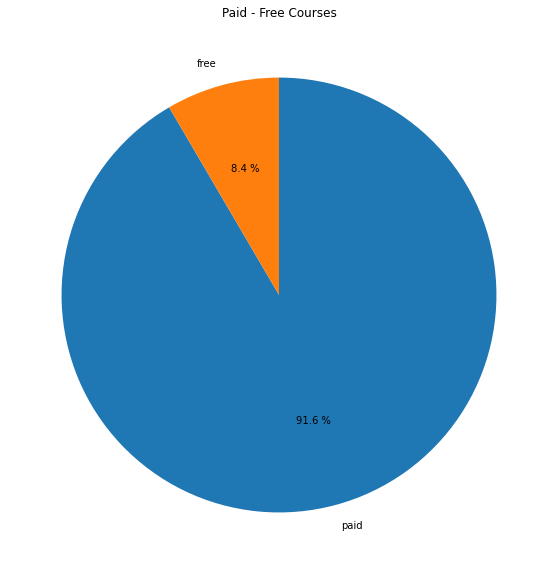

## (Subject Distribution )

> See which subject is preferable

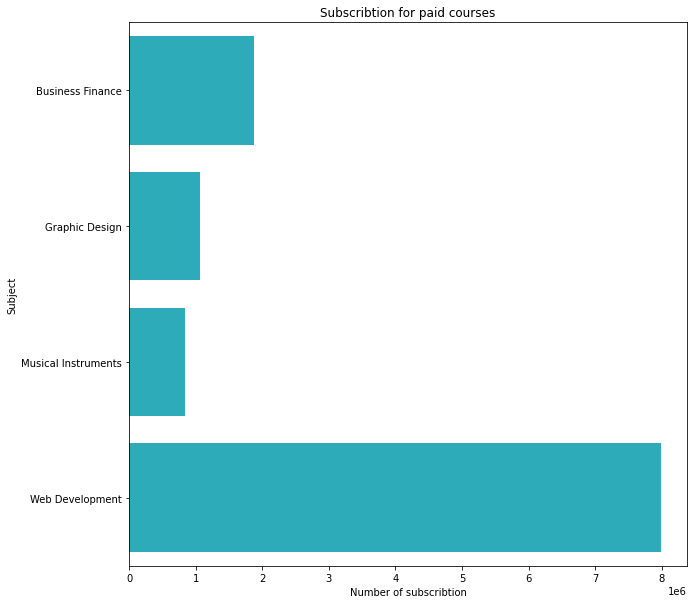

### We can see that web development is more preferable

## (Correlation between Number of Subscribers and number of reviews)

> We can see that there is a positive correlation

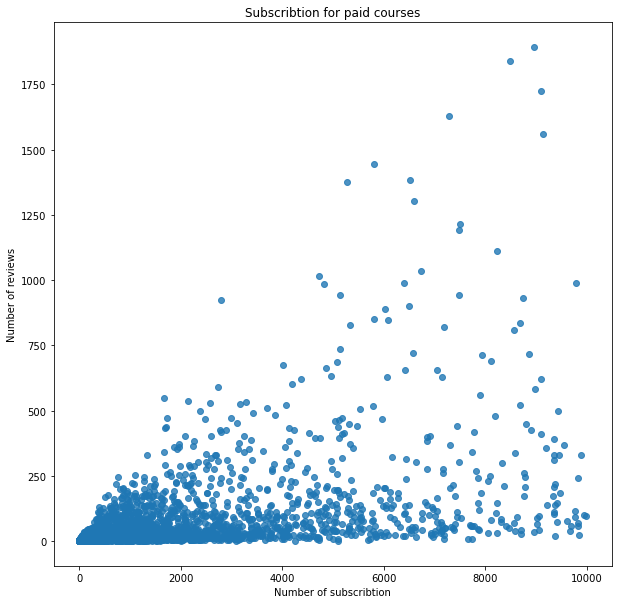

### ( Noticing that paid courses are much subscribers )

In [44]:

# paid_subscribers = courses_data.groupby(['is_paid'])['num_subscribers'].sum()
# paid_subscribers
# plt.figure(figsize = [10, 10]) 

# sb.barplot(x=paid_subscribers.index, y=paid_subscribers ,color = 'r',errwidth  = 0)
# # Change seaborn plot size
# plt.title("Subscribtion for paid courses")
# plt.xlabel('Courses')
# plt.ylabel('Number of subscribtion')

### ( Correlation between number of lectures and content duration for levels)

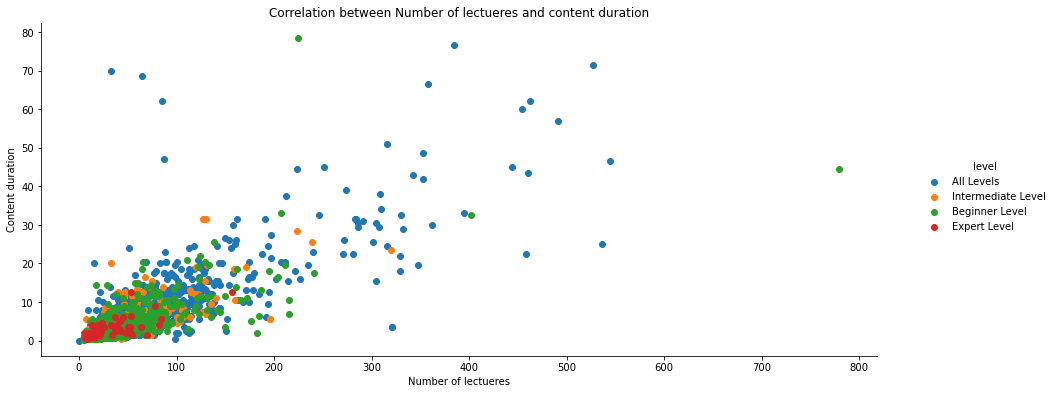

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert slide_deck_template.ipynb --to slides --post serve`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!